# Plotting some NZESM data in a Jupyter notebook

Firstly, clear all variables in the local memory...

In [497]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

Now import modules...

In [498]:
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import datetime
from iris.time import PartialDateTime
import iris.analysis
import netCDF4
from netCDF4 import Dataset
from pylab import *
import cartopy.crs as ccrs
import iris.analysis.cartography

The following renders graphics inside the Jupyter document

In [499]:
%matplotlib inline

Increase font size for graphics

In [500]:
matplotlib.rcParams['font.size'] = 24

In [501]:
# Define string arrays
dirnames = np.array(['u-ac926'])
fnames = np.array(['ac926'])
varnames = np.array(['air_temperature','precipitation_flux'])
titles = np.array(['surface air temperature','total precipitation'])

vmins=np.array([-30,0])
vmindiffs=np.array([-8,-20])
vmaxs=np.array([30,12])
vmaxdiffs=np.array([8,20])

cmaps=['RdBu_r','Blues']
cmapdiffs=['RdBu_r','RdBu']


Now let's plot some atmospheric variables.

/opt/niwa/anaconda/Anaconda-2.4.1-Python-2.7/lib/python2.7/site-packages/iris/fileformats/_ff.py:732: UserWarning: The STASH code m01s00i194 was not found in the STASH to grid type mapping. Picking the P position as the cell type
  'position as the cell type'.format(stash))
/opt/niwa/anaconda/Anaconda-2.4.1-Python-2.7/lib/python2.7/site-packages/iris/fileformats/_ff.py:732: UserWarning: The STASH code m01s00i428 was not found in the STASH to grid type mapping. Picking the P position as the cell type
  'position as the cell type'.format(stash))
/opt/niwa/anaconda/Anaconda-2.4.1-Python-2.7/lib/python2.7/site-packages/iris/fileformats/_ff.py:732: UserWarning: The STASH code m01s00i429 was not found in the STASH to grid type mapping. Picking the P position as the cell type
  'position as the cell type'.format(stash))
/opt/niwa/anaconda/Anaconda-2.4.1-Python-2.7/lib/python2.7/site-packages/iris/fileformats/_ff.py:732: UserWarning: The STASH code m01s03i365 was not found in the STASH to grid

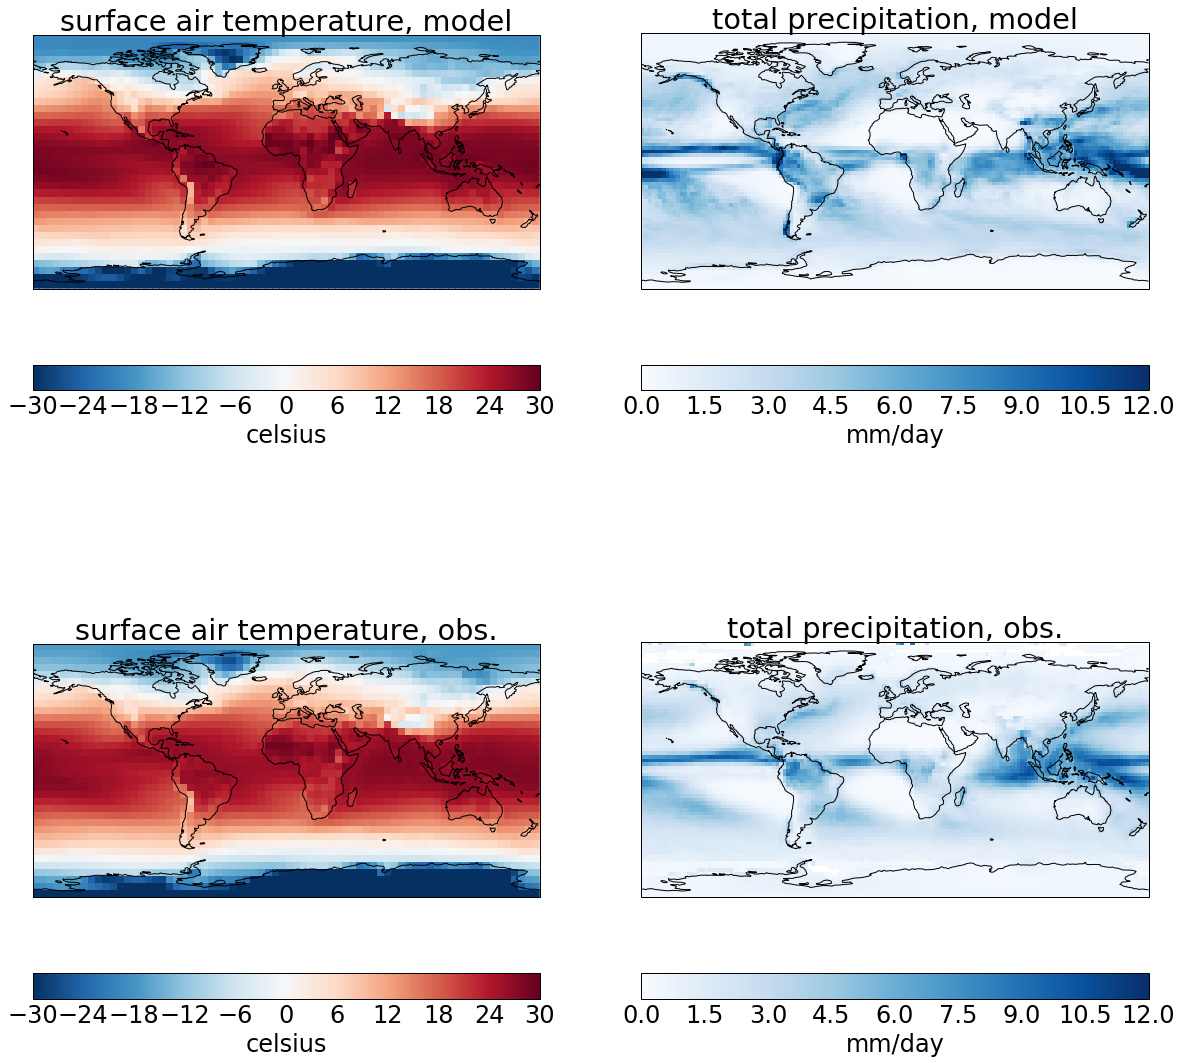

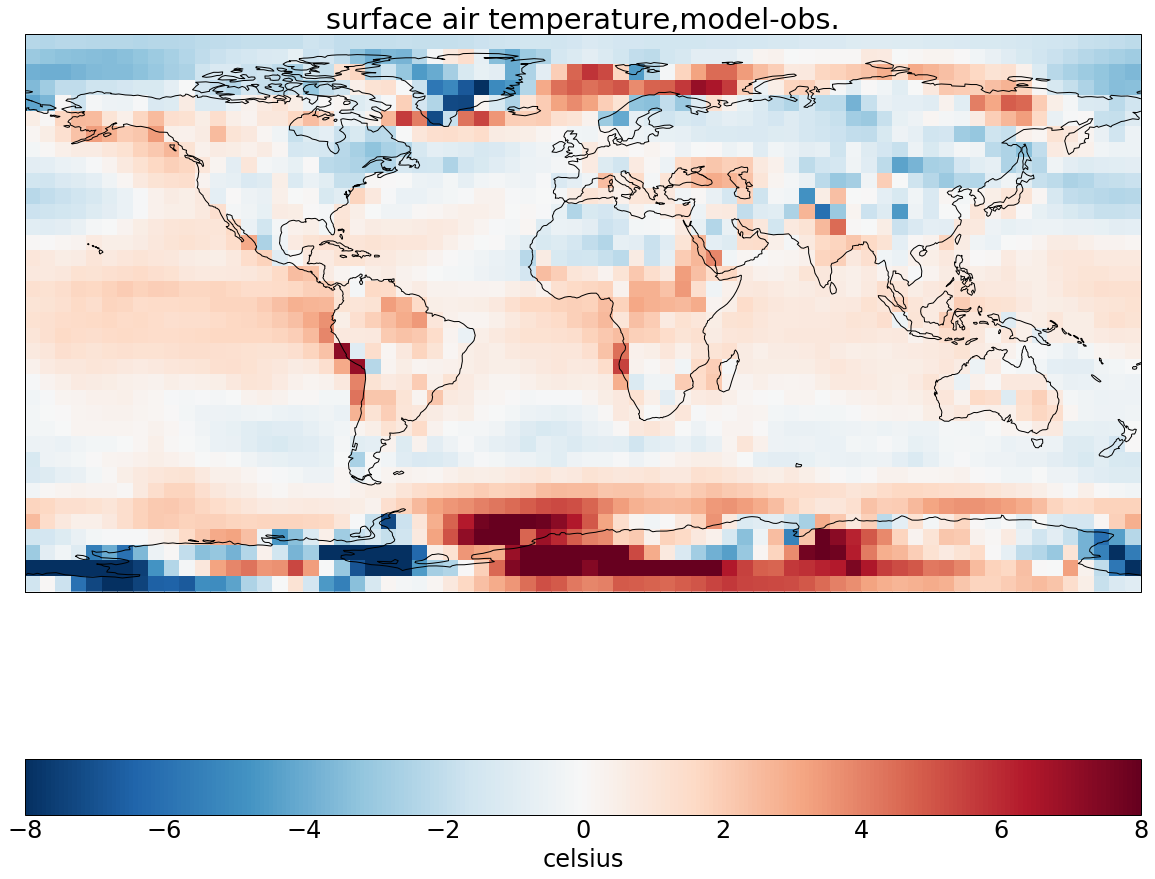

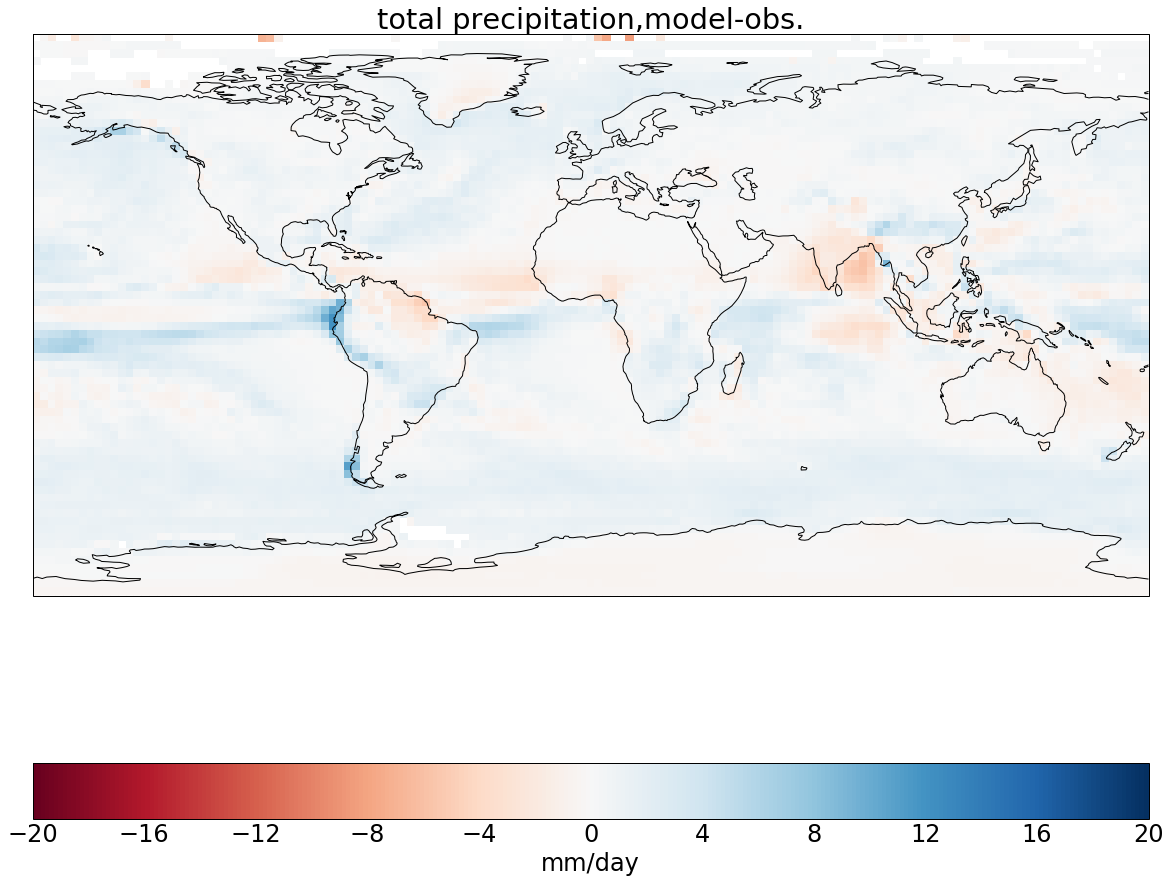

In [7]:

fig = plt.figure(figsize=(20,20))

for j in range(0,len(varnames)):# loop over different variables

    fname = '/home/williamsjh/cylc-run/'+dirnames[0]+'/share/data/History_Data/'+fnames[0]+'a.py19791201'

    cube_all = iris.load(fname, varnames[j])
    cube=cube_all[0] 
    
    for coord in cube.coords():
        coord.coord_system = None
    
    cmap = cmaps[j]
   
    if j == 0:#air temperature
        cube.data -= 273.15
        
        cube.units = 'celsius'
        
        cube_t = cube
        
        obs_all = iris.load_cube('/hpcf/data/williamsjh/obs/hadcrut/absolute.nc')
        obs_mean = obs_all.collapsed('time',iris.analysis.MEAN)
        
        obs_mean_t = obs_mean
               
    if j > 0:#precip
        cube.data *= 86400.
        
        cube.units = 'mm/day'
        
        cube_p = cube
        
        obs_all=iris.load_cube('/hpcf/data/williamsjh/obs/cmap/precip.mon.mean.nc')    
                    
        daterange = iris.Constraint(
            time=lambda cell: PartialDateTime(year=1995, month=12) <= cell <
                PartialDateTime(year=2005, month=12))
        with iris.FUTURE.context(cell_datetime_objects=True):
            obs_daterange = obs_all.extract(daterange)
   
        obs_mean = obs_daterange.collapsed('time',iris.analysis.MEAN)
    
        obs_mean_p = obs_mean
    
    subplotnumber=[j+1,j+3]
          
    plt.subplot(2,2,subplotnumber[0])
    qplt.pcolormesh(cube.regrid(obs_mean,iris.analysis.Linear()), cmap=cmap, vmin=vmins[j], vmax=vmaxs[j])
    plt.gca().coastlines()
    plt.title(titles[j]+', model')  
        
    plt.subplot(2,2,subplotnumber[1])    
    qplt.pcolormesh(obs_mean, cmap=cmap, vmin=vmins[j], vmax=vmaxs[j])
    plt.gca().coastlines()
    plt.title(titles[j]+', obs.')   
        
iplt.show()

fig = plt.figure(figsize=(20,20))
cmap=cmapdiffs[0]
qplt.pcolormesh(cube_t.regrid(obs_mean_t,iris.analysis.Linear())-obs_mean_t,
                cmap=cmap, vmin=vmindiffs[0], vmax=vmaxdiffs[0])
plt.gca().coastlines()
plt.title(titles[0]+',model-obs.')  

iplt.show()
    
    
fig = plt.figure(figsize=(20,20))
cmap=cmapdiffs[1]
qplt.pcolormesh(cube_p.regrid(obs_mean_p,iris.analysis.Linear())-obs_mean_p,
                cmap=cmap, vmin=vmindiffs[1], vmax=vmaxdiffs[1])
plt.gca().coastlines()
plt.title(titles[1]+',model-obs.')  

iplt.show()




# SSS - model



In [603]:
fname = '/home/williamsjh/cylc-run/'+dirnames[0]+\
    '/share/data/History_Data/NEMOhist/'+fnames[0]+'o_10d_19780901_19780910_grid_T.nc'
    
    
fname = '/home/williamsjh/cylc-run/'+dirnames[0]+\
   '/share/data/History_Data/NEMOhist/'+fnames[0]+'o_10d_*_grid_T.nc'
    

In [604]:
def callback(cube, field, filename):
    if 'vosaline' != cube.metadata.var_name:
        raise iris.exceptions.IgnoreCubeException()


In [605]:
import iris

cubes = iris.load(fname, 'sea_water_practical_salinity', callback=callback)

cubes = cubes.extract(iris.Constraint(depth=5.05760014e-01))

from iris.experimental.equalise_cubes import equalise_attributes
equalise_attributes(cubes)

cubes=cubes.concatenate_cube()

print(cubes)


sea_water_practical_salinity / (1e-3) (time: 242; -- : 332; -- : 362)
     Dimension coordinates:
          time                             x         -         -
     Auxiliary coordinates:
          time                             x         -         -
          latitude                         -         x         x
          longitude                        -         x         x
     Scalar coordinates:
          depth: 0.50576 m, bound=(0.0, 1.02391) m
     Attributes:
          Conventions: CF-1.5
          description: ocean T grid variables
          ibegin: 1
          interval_operation: 10 d
          interval_write: 10 d
          jbegin: 1
          ni: 362
          nj: 5
          online_operation: average
          production: An IPSL model
          title: ocean T grid variables
     Cell methods:
          mean: time


Additional way of renameing variables, thanks to Ruth Comer at the Met office! https://groups.google.com/forum/#!topic/scitools-iris/QItdG3CrbvI

In [606]:
# time1 = cubes.dim_coords[0]
# time2 = cubes.aux_coords[0]
# time1.rename('dim_time')
# time2.rename('aux_time')

In [607]:
cubes.remove_coord((cubes.coords(var_name="time_counter"))[0])

print(cubes)

sea_water_practical_salinity / (1e-3) (-- : 242; -- : 332; -- : 362)
     Auxiliary coordinates:
          time                            x         -         -
          latitude                        -         x         x
          longitude                       -         x         x
     Scalar coordinates:
          depth: 0.50576 m, bound=(0.0, 1.02391) m
     Attributes:
          Conventions: CF-1.5
          description: ocean T grid variables
          ibegin: 1
          interval_operation: 10 d
          interval_write: 10 d
          jbegin: 1
          ni: 362
          nj: 5
          online_operation: average
          production: An IPSL model
          title: ocean T grid variables
     Cell methods:
          mean: time


In [608]:
cube = cubes.collapsed('time',iris.analysis.MEAN)

In [609]:
print(cube)
print(cube.data)

sea_water_practical_salinity / (1e-3) (-- : 332; -- : 362)
     Auxiliary coordinates:
          latitude                        x         x
          longitude                       x         x
     Scalar coordinates:
          depth: 0.50576 m, bound=(0.0, 1.02391) m
          time: 1982-01-11 00:00:00, bound=(1978-09-01 00:00:00, 1985-05-21 00:00:00)
     Attributes:
          Conventions: CF-1.5
          description: ocean T grid variables
          ibegin: 1
          interval_operation: 10 d
          interval_write: 10 d
          jbegin: 1
          ni: 362
          nj: 5
          online_operation: average
          production: An IPSL model
          title: ocean T grid variables
     Cell methods:
          mean: time
          mean: time
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [610]:
target_proj = ccrs.Stereographic(central_latitude=-41.2865, central_longitude=174.7762)
new_cube, extent = iris.analysis.cartography.project(cube, target_proj,
                                                     nx=1200, ny=1200)
mask = new_cube
mask.data = np.ma.masked_where(new_cube.data == 0, new_cube.data)



In [611]:
print(new_cube.data)

[[-- -- -- ..., 36.867454528808594 36.867454528808594 36.88289260864258]
 [-- -- -- ..., 36.867454528808594 36.867454528808594 36.867454528808594]
 [-- -- -- ..., 36.867454528808594 36.867454528808594 36.867454528808594]
 ..., 
 [-- -- -- ..., 34.41512680053711 34.41512680053711 34.41512680053711]
 [-- -- -- ..., 34.41512680053711 34.41512680053711 34.41512680053711]
 [-- -- -- ..., 34.41512680053711 34.41512680053711 34.41512680053711]]


In [612]:
x = new_cube.coord('projection_x_coordinate').points
y = new_cube.coord('projection_y_coordinate').points

# take out the first, single time, dimension.
d = new_cube.data#[0, ...]




In [613]:
print(d)

[[-- -- -- ..., 36.867454528808594 36.867454528808594 36.88289260864258]
 [-- -- -- ..., 36.867454528808594 36.867454528808594 36.867454528808594]
 [-- -- -- ..., 36.867454528808594 36.867454528808594 36.867454528808594]
 ..., 
 [-- -- -- ..., 34.41512680053711 34.41512680053711 34.41512680053711]
 [-- -- -- ..., 34.41512680053711 34.41512680053711 34.41512680053711]
 [-- -- -- ..., 34.41512680053711 34.41512680053711 34.41512680053711]]


# sss - obs

In [614]:
fname_obs = '/hpcf/data/williamsjh/obs/ecmwf/ocean/ftp.icdc.zmaw.de/EASYInit/ORA-XBTC/*.nc'
#OR_TAVGf56f_199*_E0_M1_H_130.nc'


In [615]:
level_constraint = iris.Constraint(z_below_msl=5.)
iris.FUTURE.netcdf_promote=True
obs_all = iris.load(fname_obs, level_constraint)

In [616]:
obs_all=obs_all.concatenate()

print(obs_all)

0: Salinity / (1)                      (t: 228; latitude: 195; longitude: 256)


In [617]:
obs=obs_all[0]
print(obs)

Salinity / (1)                      (t: 228; latitude: 195; longitude: 256)
     Dimension coordinates:
          t                           x              -               -
          latitude                    -              x               -
          longitude                   -              -               x
     Scalar coordinates:
          z_below_msl: 5.0 m
     Attributes:
          date: 01/01/59
          history: XCONV V1.05 10-October-2001
          name: S
          source: GRIB data
          time: 00:00
          title: Salinity


In [618]:
daterange = iris.Constraint(
            t=lambda cell: PartialDateTime(year=1995, month=12) <= cell <
                PartialDateTime(year=2005, month=12))
with iris.FUTURE.context(cell_datetime_objects=True):
    obs_daterange = obs.extract(daterange)
    
    
#print(obs_daterange)
print(obs_daterange)

Salinity / (1)                      (t: 120; latitude: 195; longitude: 256)
     Dimension coordinates:
          t                           x              -               -
          latitude                    -              x               -
          longitude                   -              -               x
     Scalar coordinates:
          z_below_msl: 5.0 m
     Attributes:
          date: 01/01/59
          history: XCONV V1.05 10-October-2001
          name: S
          source: GRIB data
          time: 00:00
          title: Salinity


In [619]:
obs_mean = obs_daterange.collapsed('t',iris.analysis.MEAN)

print(obs_mean)

Salinity / (1)                      (latitude: 195; longitude: 256)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:
          t: 2000-11-15 12:00:00, bound=(1995-12-01 00:00:00, 2005-11-01 00:00:00)
          z_below_msl: 5.0 m
     Attributes:
          date: 01/01/59
          history: XCONV V1.05 10-October-2001
          name: S
          source: GRIB data
          time: 00:00
          title: Salinity
     Cell methods:
          mean: t


In [620]:
target_proj_obs = ccrs.Stereographic(central_latitude=-41.2865, central_longitude=174.7762)
new_obs, extent = iris.analysis.cartography.project(obs_mean, target_proj_obs,
                                                     nx=1200, ny=1200)


In [621]:
print(new_obs)

Salinity / (1)                      (projection_y_coordinate: 1200; projection_x_coordinate: 1200)
     Dimension coordinates:
          projection_y_coordinate                           x                              -
          projection_x_coordinate                           -                              x
     Auxiliary coordinates:
          latitude                                          x                              x
          longitude                                         x                              x
     Scalar coordinates:
          t: 2000-11-15 12:00:00, bound=(1995-12-01 00:00:00, 2005-11-01 00:00:00)
          z_below_msl: 5.0 m
     Attributes:
          date: 01/01/59
          history: XCONV V1.05 10-October-2001
          name: S
          source: GRIB data
          time: 00:00
          title: Salinity
     Cell methods:
          mean: t


In [622]:
x_obs = new_obs.coord('projection_x_coordinate').points
y_obs = new_obs.coord('projection_y_coordinate').points

d_obs = new_obs.data




In [623]:
print(d)
print(d_obs)

[[-- -- -- ..., 36.867454528808594 36.867454528808594 36.88289260864258]
 [-- -- -- ..., 36.867454528808594 36.867454528808594 36.867454528808594]
 [-- -- -- ..., 36.867454528808594 36.867454528808594 36.867454528808594]
 ..., 
 [-- -- -- ..., 34.41512680053711 34.41512680053711 34.41512680053711]
 [-- -- -- ..., 34.41512680053711 34.41512680053711 34.41512680053711]
 [-- -- -- ..., 34.41512680053711 34.41512680053711 34.41512680053711]]
[[-- -- -- ..., 37.228538513183594 37.228538513183594 37.228538513183594]
 [-- -- -- ..., 37.228538513183594 37.228538513183594 37.228538513183594]
 [-- -- -- ..., 37.228538513183594 37.228538513183594 37.228538513183594]
 ..., 
 [-- -- -- ..., 34.876136779785156 34.876136779785156 34.876136779785156]
 [-- -- -- ..., 34.876136779785156 34.876136779785156 34.876136779785156]
 [-- -- -- ..., 34.876136779785156 34.876136779785156 34.876136779785156]]


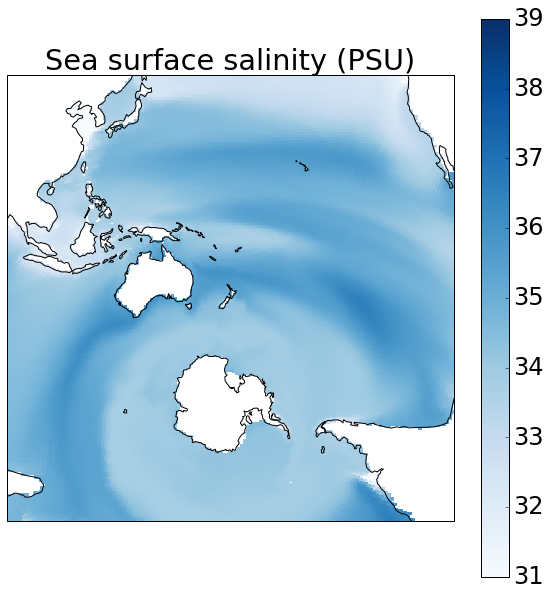

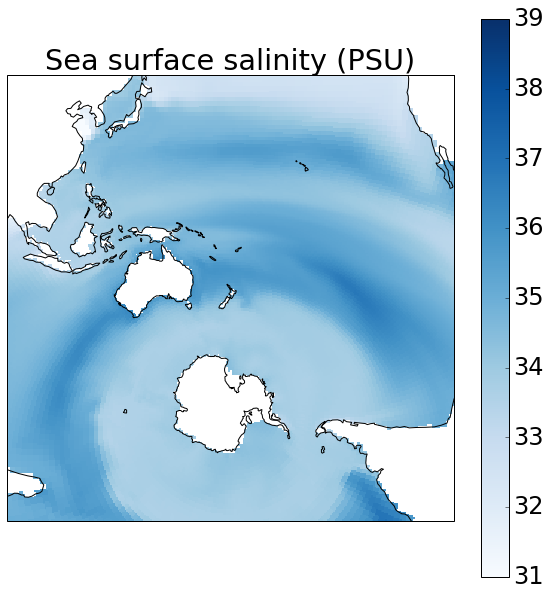

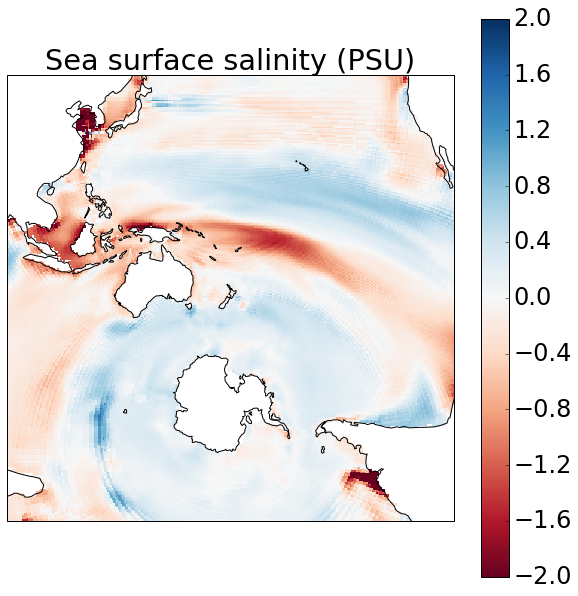

In [625]:
plt.figure(figsize=(10, 10))


#plt.subplot(2,2,1)  

ax = plt.axes(projection=target_proj)
plt.title(new_cube.name())
plt.pcolormesh(x, y, d,vmin=31,vmax=39,cmap='Blues')
plt.colorbar()
plt.title('Sea surface salinity (PSU)')
ax.coastlines()

# Set the map to a zoomed in area of the south pole
# (a quater the size of the default North Polar Stereographic map)
ax.set_xlim(*(np.array(target_proj.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj.y_limits) / 4))
plt.show()



plt.figure(figsize=(10, 10))

#plt.subplot(2,2,2)  

ax = plt.axes(projection=target_proj_obs)
plt.pcolormesh(x_obs, y_obs, d_obs,vmin=31,vmax=39,cmap='Blues')
plt.colorbar()
plt.title('Sea surface salinity (PSU)')
ax.coastlines()

# Set the map to a zoomed in area of the south pole
# (a quater the size of the default North Polar Stereographic map)
ax.set_xlim(*(np.array(target_proj_obs.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_obs.y_limits) / 4))
plt.show()


plt.figure(figsize=(10, 10))

#plt.subplot(2,2,2)  

ax = plt.axes(projection=target_proj_obs)
plt.pcolormesh(x_obs, y_obs, d-d_obs,vmin=-2,vmax=2,cmap='RdBu')
plt.colorbar()
plt.title('Sea surface salinity (PSU)')
ax.coastlines()

# Set the map to a zoomed in area of the south pole
# (a quater the size of the default North Polar Stereographic map)
ax.set_xlim(*(np.array(target_proj_obs.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_obs.y_limits) / 4))
plt.show()





# SST - model



In [562]:
fname = '/home/williamsjh/cylc-run/'+dirnames[0]+\
    '/share/data/History_Data/NEMOhist/'+fnames[0]+'o_10d_19780901_19780910_grid_T.nc'
    
    
#fname = '/home/williamsjh/cylc-run/'+dirnames[0]+\
   #'/share/data/History_Data/NEMOhist/'+fnames[0]+'o_10d_*_grid_T.nc'
    

In [563]:
def callback(cube, field, filename):
    if 'votemper' != cube.metadata.var_name:
        raise iris.exceptions.IgnoreCubeException()


In [564]:
import iris

cubes = iris.load(fname, 'sea_water_potential_temperature', callback=callback)

cubes = cubes.extract(iris.Constraint(depth=5.05760014e-01))

from iris.experimental.equalise_cubes import equalise_attributes
equalise_attributes(cubes)

cubes=cubes.concatenate_cube()

cubes.remove_coord((cubes.coords(var_name="time_counter"))[0])

print(cubes)

sea_water_potential_temperature / (degC) (-- : 1; -- : 332; -- : 362)
     Auxiliary coordinates:
          time                               x       -         -
          latitude                           -       x         x
          longitude                          -       x         x
     Scalar coordinates:
          depth: 0.50576 m, bound=(0.0, 1.02391) m
     Attributes:
          Conventions: CF-1.5
          TimeStamp: 07/10/2016 01:51:38 +0000???2??,~d?@?2???2??,??,???,...
          description: ocean T grid variables
          file_name: ac926o_10d_19780901_19780910_grid_T.nc
          ibegin: 1
          interval_operation: 10 d
          interval_write: 10 d
          jbegin: 1
          name: ac926o_10d_19780901_19780910
          ni: 362
          nj: 5
          online_operation: average
          production: An IPSL model
          timeStamp: 2016-Oct-07 00:49:46 UTC
          title: ocean T grid variables
     Cell methods:
          mean: time


In [565]:
cube = cubes.collapsed('time',iris.analysis.MEAN)

In [566]:
print(cube)
print(cube.data)

sea_water_potential_temperature / (degC) (-- : 332; -- : 362)
     Auxiliary coordinates:
          latitude                           x         x
          longitude                          x         x
     Scalar coordinates:
          depth: 0.50576 m, bound=(0.0, 1.02391) m
          time: 1978-09-06 00:00:00, bound=(1978-09-01 00:00:00, 1978-09-11 00:00:00)
     Attributes:
          Conventions: CF-1.5
          TimeStamp: 07/10/2016 01:51:38 +0000???2??,~d?@?2???2??,??,???,...
          description: ocean T grid variables
          file_name: ac926o_10d_19780901_19780910_grid_T.nc
          ibegin: 1
          interval_operation: 10 d
          interval_write: 10 d
          jbegin: 1
          name: ac926o_10d_19780901_19780910
          ni: 362
          nj: 5
          online_operation: average
          production: An IPSL model
          timeStamp: 2016-Oct-07 00:49:46 UTC
          title: ocean T grid variables
     Cell methods:
          mean: time
   

In [567]:
target_proj = ccrs.Stereographic(central_latitude=-41.2865, central_longitude=174.7762)
new_cube, extent = iris.analysis.cartography.project(cube, target_proj,
                                                     nx=1200, ny=1200)
mask = new_cube
mask.data = np.ma.masked_where(new_cube.data == 0, new_cube.data)



In [568]:
print(new_cube.data)

[[-- -- -- ..., 24.794261932373047 24.794261932373047 24.72493553161621]
 [-- -- -- ..., 24.794261932373047 24.794261932373047 24.794261932373047]
 [-- -- -- ..., 24.794261932373047 24.794261932373047 24.794261932373047]
 ..., 
 [-- -- -- ..., 12.688417434692383 12.688417434692383 12.688417434692383]
 [-- -- -- ..., 12.688417434692383 12.688417434692383 12.688417434692383]
 [-- -- -- ..., 12.688417434692383 12.688417434692383 12.688417434692383]]


In [569]:
x = new_cube.coord('projection_x_coordinate').points
y = new_cube.coord('projection_y_coordinate').points

# take out the first, single time, dimension.
d = new_cube.data#[0, ...]




In [570]:
print(d)

[[-- -- -- ..., 24.794261932373047 24.794261932373047 24.72493553161621]
 [-- -- -- ..., 24.794261932373047 24.794261932373047 24.794261932373047]
 [-- -- -- ..., 24.794261932373047 24.794261932373047 24.794261932373047]
 ..., 
 [-- -- -- ..., 12.688417434692383 12.688417434692383 12.688417434692383]
 [-- -- -- ..., 12.688417434692383 12.688417434692383 12.688417434692383]
 [-- -- -- ..., 12.688417434692383 12.688417434692383 12.688417434692383]]


# sst - obs 

In [578]:
fname_obs = ('/hpcf/data/williamsjh/obs/hadisst/sst/HadISST_sst.nc')

obs = iris.load_cube(fname_obs,'sea_surface_temperature')#,'NOAA/NSIDC Climate Data Record of Passive Microwave Monthly Southern Hemisphere Sea Ice Concentration')

#print(obs[2].long_name)

obs_all = obs

In [591]:
obs_all.data[obs_all.data == -1000.]=np.nan
print(obs_all.data)

[[[nan nan nan ..., nan nan nan]
  [nan nan nan ..., nan nan nan]
  [nan nan nan ..., nan nan nan]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 [[nan nan nan ..., nan nan nan]
  [nan nan nan ..., nan nan nan]
  [nan nan nan ..., nan nan nan]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 [[nan nan nan ..., nan nan nan]
  [nan nan nan ..., nan nan nan]
  [nan nan nan ..., nan nan nan]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 ..., 
 [[nan nan nan ..., nan nan nan]
  [nan nan nan ..., nan nan nan]
  [-1.7999999523162842 -1.7999999523162842 -1.7999999523162842 ...,
   -1.7999999523162842 -1.7999999523162842 -1.7999999523162842]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]

 [[-1.7999999523162842 -1.7999999523162842 -1.7999999523162842 ...,
   -1.7999999523162842 -1.7999999523162842 -1.7999999523162842]
  

In [579]:
#obs = obs.extract(iris.Constraint(z_below_msl=5.))
#print(obs_all)

In [594]:
daterange = iris.Constraint(
            time=lambda cell: PartialDateTime(year=1995, month=12) <= cell <
                PartialDateTime(year=2005, month=12))
with iris.FUTURE.context(cell_datetime_objects=True):
    obs_daterange = obs_all.extract(daterange)
   
obs_mean = obs_daterange.collapsed('time',iris.analysis.MEAN)

/opt/niwa/anaconda/Anaconda-2.4.1-Python-2.7/lib/python2.7/site-packages/numpy/ma/core.py:809: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


In [595]:
#obs=obs[0]
#print(obs_mean)

In [596]:
#mask = obs_mean
#mask.data = np.ma.masked_where(obs_mean.data == -1000., obs_mean.data)


In [597]:
np.amin(obs_mean.data)

-1.7438181559244792

In [598]:



target_proj_obs_south = ccrs.Stereographic(central_latitude=-41.2865, central_longitude=174.7762)
target_proj_obs_north = ccrs.Stereographic(central_latitude=90, central_longitude=0)

new_obs_south, extent = iris.analysis.cartography.project(obs_mean, target_proj_obs_south,nx=1200, ny=1200)
new_obs_north, extent = iris.analysis.cartography.project(obs_mean, target_proj_obs_north,nx=1200, ny=1200)




In [599]:
x_obs_south = new_obs_south.coord('projection_x_coordinate').points
y_obs_south = new_obs_south.coord('projection_y_coordinate').points

x_obs_north = new_obs_north.coord('projection_x_coordinate').points
y_obs_north = new_obs_north.coord('projection_y_coordinate').points


d_obs_south = new_obs_south.data
d_obs_north = new_obs_north.data




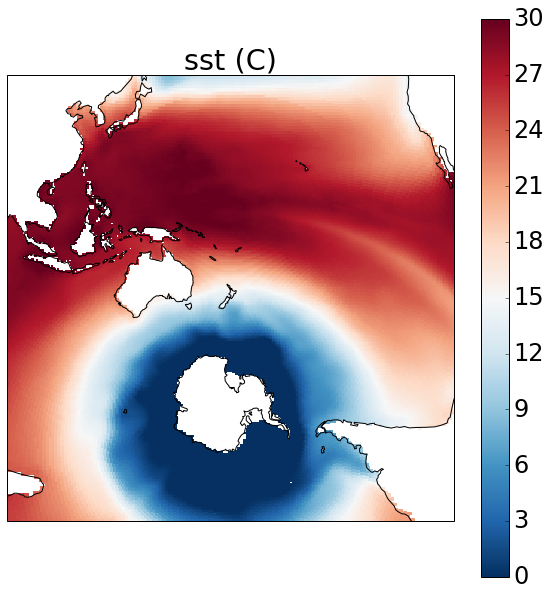

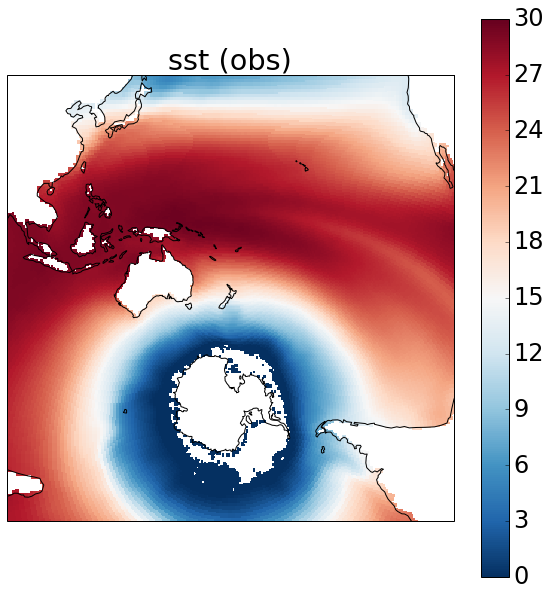

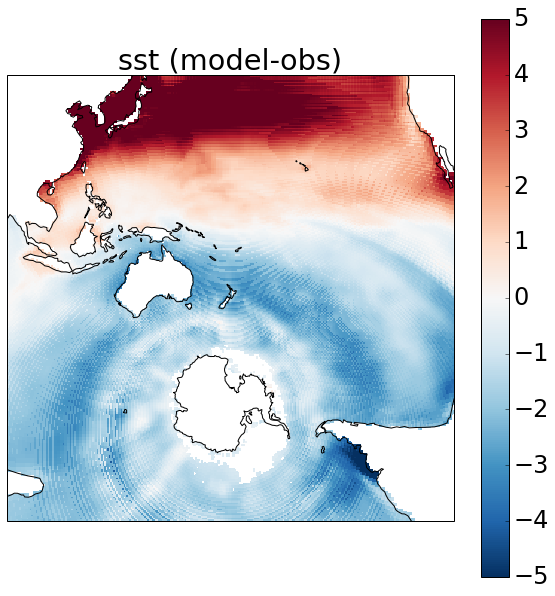

In [601]:
plt.figure(figsize=(10, 10))


#plt.subplot(2,2,1)  

ax = plt.axes(projection=target_proj)
plt.title(new_cube.name())
plt.pcolormesh(x, y, d,vmin=0,vmax=30,cmap='RdBu_r')
plt.colorbar()
plt.title('sst (C)')
ax.coastlines()

# Set the map to a zoomed in area of the south pole
# (a quater the size of the default North Polar Stereographic map)
ax.set_xlim(*(np.array(target_proj.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj.y_limits) / 4))
plt.show()



plt.figure(figsize=(10, 10))

#plt.subplot(2,2,4)  

ax = plt.axes(projection=target_proj_obs_south)
plt.pcolormesh(x_obs_south,y_obs_south,new_obs_south.data,vmin=0,vmax=30,cmap='RdBu_r')
plt.colorbar()
plt.title('sst (obs)')
ax.coastlines()

# Set the map to a zoomed in area of the south pole
# (a quater the size of the default North Polar Stereographic map)
ax.set_xlim(*(np.array(target_proj_obs_south.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_obs_south.y_limits) / 4))
plt.show()


plt.figure(figsize=(10, 10))

#plt.subplot(2,2,4)  

ax = plt.axes(projection=target_proj_obs_south)
#plt.pcolormesh(x_obs_south,y_obs_south,d-new_obs_south.data,cmap='RdBu_r')
plt.pcolormesh(x_obs_south,y_obs_south,d-new_obs_south.data,vmin=-5,vmax=5,cmap='RdBu_r')
plt.colorbar()
plt.title('sst (model-obs)')
ax.coastlines()

# Set the map to a zoomed in area of the south pole
# (a quater the size of the default North Polar Stereographic map)
ax.set_xlim(*(np.array(target_proj_obs_south.x_limits) / 4))
ax.set_ylim(*(np.array(target_proj_obs_south.y_limits) / 4))
plt.show()

# sea ice - model

In [125]:
fname = '/home/williamsjh/cylc-run/'+dirnames[0]+\
    '/share/data/History_Data/CICEhist/'+fnames[0]+'i.10d.1978-09-10.nc'
    
fname = '/home/williamsjh/cylc-run/'+dirnames[0]+\
    '/share/data/History_Data/CICEhist/'+fnames[0]+'i.10d.*.nc'    
    
#print(fname)    

In [126]:
import iris
cubes = iris.load(fname,'ice area  (aggregate)')
#print(cubes[1].coord('time'))
from iris.experimental.equalise_cubes import equalise_attributes
equalise_attributes(cubes)
#test=iris.experimental.equalise_cubes.equalise_attributes(cubes)

#print(test)

In [127]:




#concat=cubes.concatenate_cube()

cubes_concat=cubes.concatenate_cube()
print(cubes_concat)


ice area  (aggregate) / (1)         (time: 232; -- : 330; -- : 360)
     Dimension coordinates:
          time                           x         -         -
     Auxiliary coordinates:
          latitude                       -         x         x
          longitude                      -         x         x
     Cell Measures:
          area of T grid cells           -         x         x
     Attributes:
          comment: All years have exactly 360 days
          comment3: seconds elapsed into model date:      0
          contents: Diagnostic and Prognostic Variables
          conventions: CF-1.0
          io_flavor: io_netcdf
          source: Los Alamos Sea Ice Model (CICE) Version 5
          time_rep: averaged
          title: sea ice model output for CICE
     Cell methods:
          mean: time


In [128]:
cubes_mean = cubes_concat.collapsed('time',iris.analysis.MEAN)

print(cubes_mean)

ice area  (aggregate) / (1)         (-- : 330; -- : 360)
     Auxiliary coordinates:
          latitude                      x         x
          longitude                     x         x
     Cell Measures:
          area of T grid cells          x         x
     Scalar coordinates:
          time: 1981-11-21 00:00:00, bound=(1978-09-01 00:00:00, 1985-02-11 00:00:00)
     Attributes:
          comment: All years have exactly 360 days
          comment3: seconds elapsed into model date:      0
          contents: Diagnostic and Prognostic Variables
          conventions: CF-1.0
          io_flavor: io_netcdf
          source: Los Alamos Sea Ice Model (CICE) Version 5
          time_rep: averaged
          title: sea ice model output for CICE
     Cell methods:
          mean: time
          mean: time


In [50]:
#cube = cubes.extract('ice area  (aggregate)')
#cube=cubes[0]
#for z in range(0,len(cubes)):
#    print(cubes[z])

#cubes_mean = cubes.collapsed('time',iris.analysis.MEAN)

#print(cubes_mean)

#print(cubes)



In [51]:
target_proj_south = ccrs.Stereographic(central_latitude=-90, central_longitude=174.7762)
target_proj_north = ccrs.Stereographic(central_latitude=90, central_longitude=0)

new_cube_south, extent = iris.analysis.cartography.project(cubes_mean, target_proj_south,nx=1200, ny=1200)
new_cube_north, extent = iris.analysis.cartography.project(cubes_mean, target_proj_north,nx=1200, ny=1200)




In [52]:
x_south = new_cube_south.coord('projection_x_coordinate').points
y_south = new_cube.coord('projection_y_coordinate').points

x_north = new_cube_south.coord('projection_x_coordinate').points
y_north = new_cube_north.coord('projection_y_coordinate').points


d_south = new_cube_south.data
d_south=np.squeeze(d_south)

d_north = new_cube_north.data
d_north=np.squeeze(d_north)


#print(d)





# sea ice - obs

In [53]:
fname_obs = ('/hpcf/data/williamsjh/obs/hadisst/ice/HadISST_ice.nc')

obs = iris.load_cube(fname_obs,'sea_ice_area_fraction')#,'NOAA/NSIDC Climate Data Record of Passive Microwave Monthly Southern Hemisphere Sea Ice Concentration')

#print(obs[2].long_name)

obs_all = obs

In [54]:
#obs = obs.extract(iris.Constraint(z_below_msl=5.))
#print(obs_all)

In [55]:
daterange = iris.Constraint(
            time=lambda cell: PartialDateTime(year=1995, month=12) <= cell <
                PartialDateTime(year=2005, month=12))
with iris.FUTURE.context(cell_datetime_objects=True):
    obs_daterange = obs_all.extract(daterange)
   
obs_mean = obs_daterange.collapsed('time',iris.analysis.MEAN)

/opt/niwa/anaconda/Anaconda-2.4.1-Python-2.7/lib/python2.7/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'time'.
  warnings.warn(msg.format(self.name()))


In [56]:
#obs=obs[0]
#print(obs_mean)

In [57]:



target_proj_obs_south = ccrs.Stereographic(central_latitude=-90, central_longitude=174.7762)
target_proj_obs_north = ccrs.Stereographic(central_latitude=90, central_longitude=0)

new_obs_south, extent = iris.analysis.cartography.project(obs_mean, target_proj_obs_south,nx=1200, ny=1200)
new_obs_north, extent = iris.analysis.cartography.project(obs_mean, target_proj_obs_north,nx=1200, ny=1200)



In [58]:
x_obs_south = new_obs_south.coord('projection_x_coordinate').points
y_obs_south = new_obs_south.coord('projection_y_coordinate').points

x_obs_north = new_obs_north.coord('projection_x_coordinate').points
y_obs_north = new_obs_north.coord('projection_y_coordinate').points


d_obs_south = new_obs_south.data
d_obs_north = new_obs_north.data




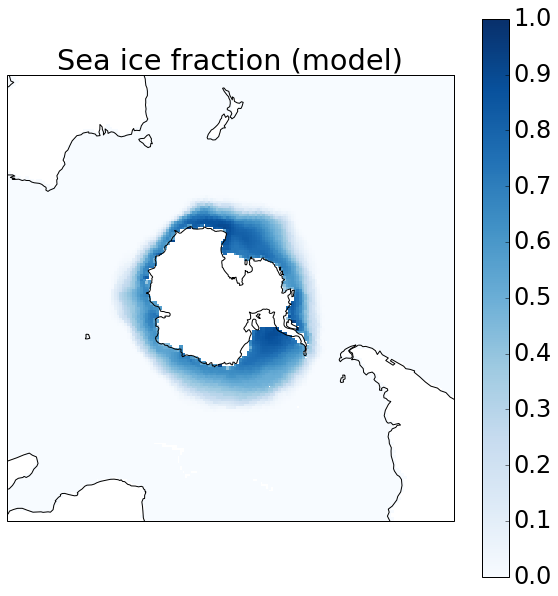

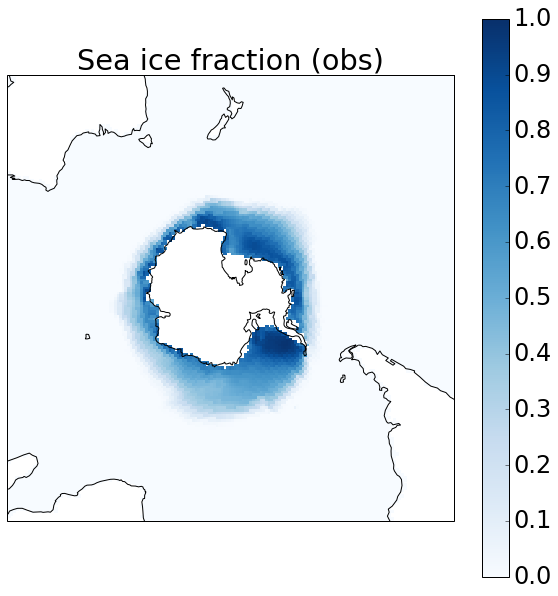

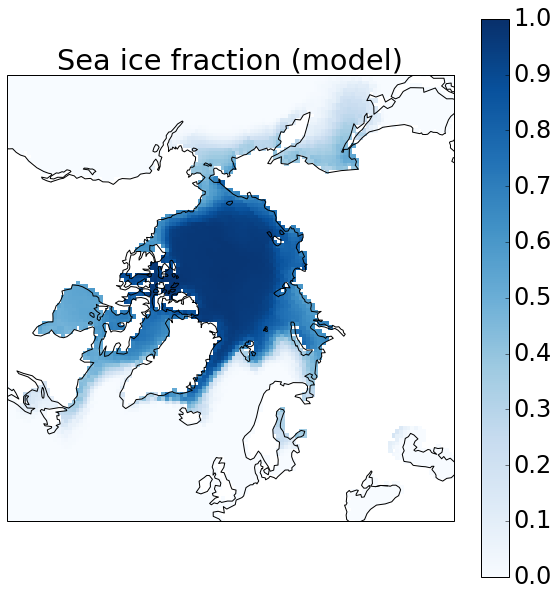

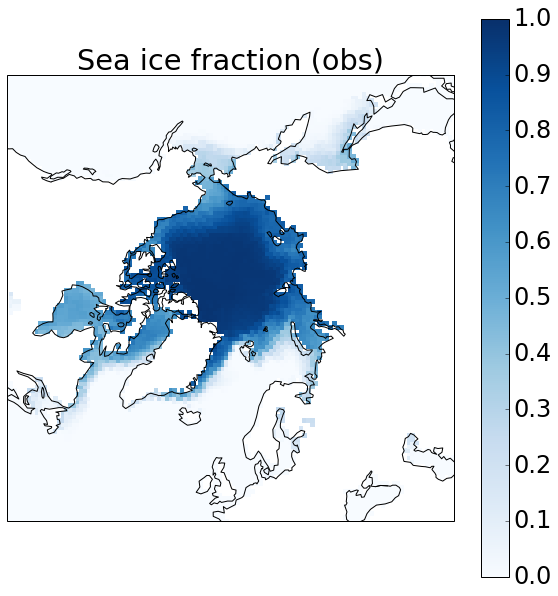

In [60]:
plt.figure(figsize=(10, 10))


plt.subplot(2,2,1)  

ax = plt.axes(projection=target_proj_south)


plt.pcolormesh(x_south, y_south, d_south,vmin=0,vmax=1,cmap='Blues')
plt.colorbar()
plt.title('Sea ice fraction (model)')
ax.coastlines()

# Set the map to a zoomed in area of the south pole
# (a quater the size of the default North Polar Stereographic map)
ax.set_xlim(*(np.array(target_proj_south.x_limits) / 7))
ax.set_ylim(*(np.array(target_proj_south.y_limits) / 7))
plt.show()




plt.figure(figsize=(10, 10))

plt.subplot(2,2,2)  

ax = plt.axes(projection=target_proj_obs_south)
plt.pcolormesh(x_obs_south,y_obs_south,new_obs_south.data,vmin=0,vmax=1,cmap='Blues')
plt.colorbar()
plt.title('Sea ice fraction (obs)')
ax.coastlines()

# Set the map to a zoomed in area of the south pole
# (a quater the size of the default North Polar Stereographic map)
ax.set_xlim(*(np.array(target_proj_obs_south.x_limits) / 7))
ax.set_ylim(*(np.array(target_proj_obs_south.y_limits) / 7))
plt.show()



plt.figure(figsize=(10, 10))


plt.subplot(2,2,3)  

ax = plt.axes(projection=target_proj_north)
plt.pcolormesh(x_north, y_north, d_north,vmin=0,vmax=1,cmap='Blues')
plt.colorbar()
plt.title('Sea ice fraction (model)')
ax.coastlines()

# Set the map to a zoomed in area of the south pole
# (a quater the size of the default North Polar Stereographic map)
ax.set_xlim(*(np.array(target_proj_north.x_limits) / 10))
ax.set_ylim(*(np.array(target_proj_north.y_limits) / 10))
plt.show()


plt.figure(figsize=(10, 10))

plt.subplot(2,2,4)  

ax = plt.axes(projection=target_proj_obs_north)
plt.pcolormesh(x_obs_north,y_obs_north,new_obs_north.data,vmin=0,vmax=1,cmap='Blues')
plt.colorbar()
plt.title('Sea ice fraction (obs)')
ax.coastlines()

# Set the map to a zoomed in area of the south pole
# (a quater the size of the default North Polar Stereographic map)
ax.set_xlim(*(np.array(target_proj_obs_north.x_limits) / 10))
ax.set_ylim(*(np.array(target_proj_obs_north.y_limits) / 10))
plt.show()

